In [31]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import cmocean
import mplsettings

%matplotlib inline

print("numpy version  : ", np.__version__)
print("xarray version : ", xr.__version__)

numpy version  :  1.26.4
xarray version :  2025.3.1


In [32]:
#dirstix = "/net2/rnd/dev/stixfonts/fonts/static_ttf"
dirstix = "../../common/static_ttf"

import matplotlib.font_manager as font_manager
for font in font_manager.findSystemFonts(dirstix):
    font_manager.fontManager.addfont(font)

# Set font family globally
plt.rcParams['font.family'] = 'STIX Two Text'

In [33]:
ds = xr.open_mfdataset('thetao_xyave_001_drift.nc') 
thetao_xyave_001_drift = ds['thetao_xyave_001_drift']

ds = xr.open_mfdataset('thetao_xyave_209_313_437_drift.nc') 
thetao_xyave_209_313_437_drift = ds['thetao_xyave_209_313_437_drift']

ds = xr.open_mfdataset('thetao_xyave_210_230_306_drift.nc') 
thetao_xyave_210_230_306_drift = ds['thetao_xyave_210_230_306_drift']

In [34]:
splitscale = 1500

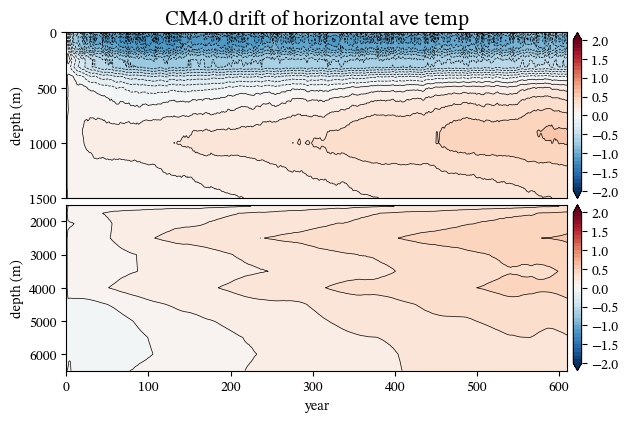

In [35]:
fig   = plt.figure(figsize=(6.5,4.0))

field = thetao_xyave_001_drift

rangemax = 2.0
interval = 0.1
levels1 = np.arange(-1.0 * rangemax, rangemax+interval, interval)

rangemax = 2.0
interval = 0.1
levels2 = np.arange(-1.0 * rangemax, rangemax+interval, interval)

time   = field['year'].values
depth  = field['z_l'].values
var    = field.values

axis1  = plt.subplot(211)
cup = plt.contourf(time, depth, var.T, levels=levels1, cmap="RdBu_r", extend="both")
axis1.set_ylim(0,splitscale)
axis1.invert_yaxis()
axis1.get_xaxis().set_visible(False)
axis1.set_ylabel('depth (m)')
axis1.set_xlabel('year')
axis1.set_xlim(0, 610)
axis1.set_title('CM4.0 drift of horizontal ave temp',fontsize=15)
cbar = plt.colorbar(cup,pad=0.01,spacing='uniform', extend='both')
cs = plt.contour(time, depth, var.T, levels=levels1, colors=["k"], linewidths=0.5)


axis2  = plt.subplot(212)
clo = plt.contourf(time, depth, var.T, levels=levels2, cmap="RdBu_r", extend="both")
axis2.set_ylim(splitscale,6500)
axis2.invert_yaxis()
axis2.set_ylabel('depth (m)')
axis2.set_xlabel('year')
axis2.set_xlim(0, 610)
cbar = plt.colorbar(clo,pad=0.01,spacing='uniform', extend='both')
cs = plt.contour(time, depth, var.T, levels=levels2, colors=["k"], linewidths=0.5)
   
plt.tight_layout(pad=-.1)

plt.show()
fig.savefig('Fig18_CM4p0_piControl_depth_time_temp.jpg', bbox_inches='tight', dpi=400, format='jpeg')


Text(0.5, 1.0, 'Temperature profiles for CM4.0')

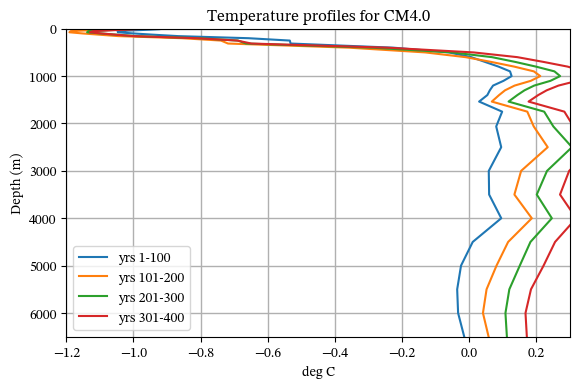

In [36]:
fig, axis = plt.subplots(ncols=1, nrows=1, figsize=(6.5,4.0))

field = thetao_xyave_001_drift

data_years_A = field.sel(year=slice(1, 100))
data_mean_A  = data_years_A.mean(dim='year')
legendA = 'yrs 1-100'

data_years_B = field.sel(year=slice(101,200))
data_mean_B  = data_years_B.mean(dim='year')
legendB = 'yrs 101-200'

data_years_C = field.sel(year=slice(201,300))
data_mean_C  = data_years_C.mean(dim='year')
legendC = 'yrs 201-300'

data_years_D = field.sel(year=slice(301,400))
data_mean_D  = data_years_D.mean(dim='year')
legendD = 'yrs 301-400'

plt.plot(data_mean_A,data_mean_A.z_l, label=legendA)
plt.plot(data_mean_B,data_mean_B.z_l, label=legendB)
plt.plot(data_mean_C,data_mean_C.z_l, label=legendC)
plt.plot(data_mean_D,data_mean_D.z_l, label=legendD)

#, ax=axis,label='10yr',linestyle='solid', color='black',linewidth=1) 
plt.gca().invert_yaxis()  # Invert the vertical axis

axis.legend(loc='lower left')
axis.set_ylim(6500,0)
axis.set_xlim(-1.2, .3)

axis.set_ylabel('Depth (m)')
axis.set_xlabel('deg C')
axis.grid(linewidth=1)
axis.set_title('Temperature profiles for CM4.0')
#fig.savefig('temperature_profiles_CM4p0.jpg', bbox_inches='tight', dpi=400, format='jpeg')


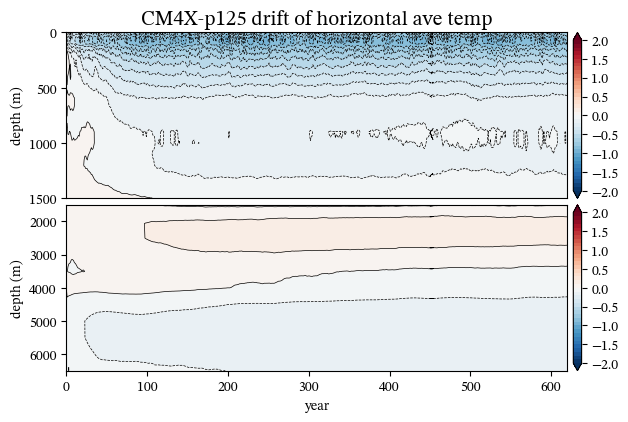

In [37]:
fig   = plt.figure(figsize=(6.5,4.0))

#field = p125_glb
field = thetao_xyave_209_313_437_drift

time   = field['year2'].year2
#time   = field['time'].time.dt.year
depth  = field['z_l'].values
var    = field.values

axis1  = plt.subplot(211)
cup = plt.contourf(time, depth, var.T, levels=levels1, cmap="RdBu_r", extend="both")
axis1.set_ylim(0,splitscale)
axis1.invert_yaxis()
axis1.get_xaxis().set_visible(False)
axis1.set_ylabel('depth (m)')
axis1.set_xlabel('year')
axis1.set_xlim(0, 620)
axis1.set_title('CM4X-p125 drift of horizontal ave temp',fontsize=15)
cbar = plt.colorbar(cup,pad=0.01,spacing='uniform', extend='both')
cs = plt.contour(time, depth, var.T, levels=levels1, colors=["k"], linewidths=0.5)


axis2  = plt.subplot(212)
clo = plt.contourf(time, depth, var.T, levels=levels2, cmap="RdBu_r", extend="both")
axis2.set_ylim(splitscale,6500)
axis2.invert_yaxis()
axis2.set_ylabel('depth (m)')
axis2.set_xlabel('year')
axis2.set_xlim(0, 620)
cbar = plt.colorbar(clo,pad=0.01,spacing='uniform', extend='both')
cs = plt.contour(time, depth, var.T, levels=levels2, colors=["k"], linewidths=0.5)
   
plt.tight_layout(pad=-.1)

plt.show()
fig.savefig('Fig18_CM4Xp125_piControl_depth_time_temp_glb.jpg', bbox_inches='tight', dpi=400, format='jpeg')



Text(0.5, 1.0, 'Temperature drift profiles for CM4X-p125')

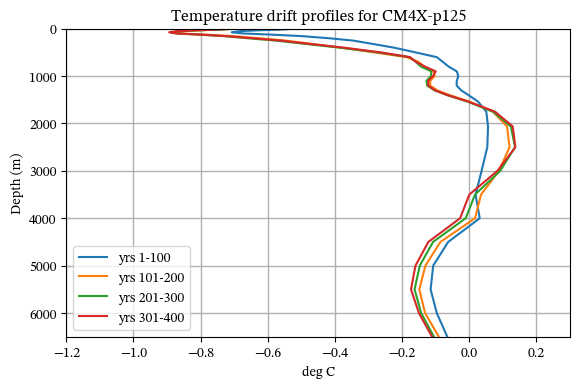

In [38]:
fig, axis = plt.subplots(ncols=1, nrows=1, figsize=(6.5,4.0))

field = thetao_xyave_209_313_437_drift

data_years_A = field.sel(year=slice(1750,1849))
data_mean_A  = data_years_A.mean(dim='year')
legendA = 'yrs 1-100'

data_years_B = field.sel(year=slice(1850,1949))
data_mean_B  = data_years_B.mean(dim='year')
legendB = 'yrs 101-200'

data_years_C = field.sel(year=slice(1950,2049))
data_mean_C  = data_years_C.mean(dim='year')
legendC = 'yrs 201-300'

data_years_D = field.sel(year=slice(2050,2149))
data_mean_D  = data_years_D.mean(dim='year')
legendD = 'yrs 301-400'


plt.plot(data_mean_A,data_mean_A.z_l, label=legendA)
plt.plot(data_mean_B,data_mean_B.z_l, label=legendB)
plt.plot(data_mean_C,data_mean_C.z_l, label=legendC)
plt.plot(data_mean_D,data_mean_D.z_l, label=legendD)

#, ax=axis,label='10yr',linestyle='solid', color='black',linewidth=1) 
plt.gca().invert_yaxis()  # Invert the vertical axis

axis.legend(loc='lower left')
axis.set_ylim(6500,0)
axis.set_xlim(-1.2, .3)

axis.set_ylabel('Depth (m)')
axis.set_xlabel('deg C')
axis.grid(linewidth=1)
axis.set_title('Temperature drift profiles for CM4X-p125')
#fig.savefig('temperature_profiles_CM4Xp125.jpg', bbox_inches='tight', dpi=400, format='jpeg')



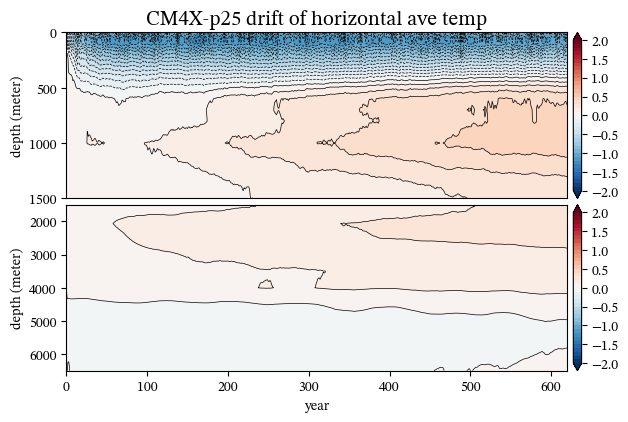

In [39]:
fig   = plt.figure(figsize=(6.5,4.0))

field = thetao_xyave_210_230_306_drift

rangemax = 2.0
interval = 0.1
levels1 = np.arange(-1.0 * rangemax, rangemax+interval, interval)

rangemax = 2.0
interval = 0.1
levels2 = np.arange(-1.0 * rangemax, rangemax+interval, interval)

time   = field['year2'].values
depth  = field['z_l'].values
var    = field.values

axis1  = plt.subplot(211)
cup = plt.contourf(time, depth, var.T, levels=levels1, cmap="RdBu_r", extend="both")
axis1.set_ylim(0,splitscale)
axis1.invert_yaxis()
axis1.get_xaxis().set_visible(False)
axis1.set_ylabel('depth (meter)')
axis1.set_xlabel('year')
axis1.set_xlim(0, 620)
axis1.set_title('CM4X-p25 drift of horizontal ave temp',fontsize=15)
cbar = plt.colorbar(cup,pad=0.01,spacing='uniform', extend='both')
cs = plt.contour(time, depth, var.T, levels=levels1, colors=["k"], linewidths=0.5)


axis2  = plt.subplot(212)
clo = plt.contourf(time, depth, var.T, levels=levels2, cmap="RdBu_r", extend="both")
axis2.set_ylim(splitscale,6500)
axis2.invert_yaxis()
axis2.set_ylabel('depth (meter)')
axis2.set_xlabel('year')
axis2.set_xlim(0, 620)
cbar = plt.colorbar(clo,pad=0.01,spacing='uniform', extend='both')
cs = plt.contour(time, depth, var.T, levels=levels2, colors=["k"], linewidths=0.5)
   
plt.tight_layout(pad=-.1)

plt.show()
fig.savefig('Fig18_CM4Xp25_piControl_depth_time_temp.jpg', bbox_inches='tight', dpi=400, format='jpeg')



Text(0.5, 1.0, 'Temperature drift profiles for CM4X-p25')

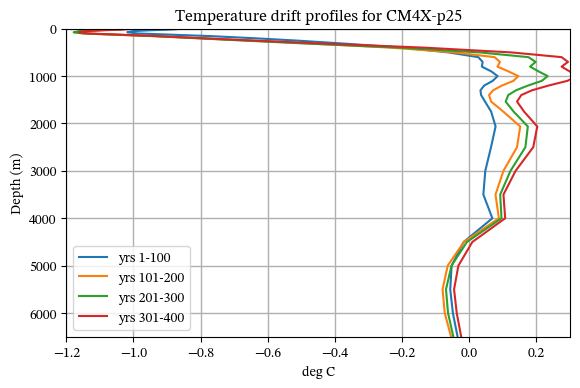

In [40]:
fig, axis = plt.subplots(ncols=1, nrows=1, figsize=(6.5,4.0))

field = thetao_xyave_210_230_306_drift

data_years_A = field.sel(year=slice(1750,1849))
data_mean_A  = data_years_A.mean(dim='year')
legendA = 'yrs 1-100'

data_years_B = field.sel(year=slice(1850,1949))
data_mean_B  = data_years_B.mean(dim='year')
legendB = 'yrs 101-200'

data_years_C = field.sel(year=slice(1950,2049))
data_mean_C  = data_years_C.mean(dim='year')
legendC = 'yrs 201-300'

data_years_D = field.sel(year=slice(2050,2149))
data_mean_D  = data_years_D.mean(dim='year')
legendD = 'yrs 301-400'


plt.plot(data_mean_A,data_mean_A.z_l, label=legendA)
plt.plot(data_mean_B,data_mean_B.z_l, label=legendB)
plt.plot(data_mean_C,data_mean_C.z_l, label=legendC)
plt.plot(data_mean_D,data_mean_D.z_l, label=legendD)

#, ax=axis,label='10yr',linestyle='solid', color='black',linewidth=1) 
plt.gca().invert_yaxis()  # Invert the vertical axis

axis.legend(loc='lower left')
axis.set_ylim(6500,0)
axis.set_xlim(-1.2, .3)

axis.set_ylabel('Depth (m)')
axis.set_xlabel('deg C')
axis.grid(linewidth=1)
axis.set_title('Temperature drift profiles for CM4X-p25')
#fig.savefig('temperature_profiles_CM4Xp25.jpg', bbox_inches='tight', dpi=400, format='jpeg')